# Justin Dilabio

## How does BMI correlate to medical event and conditions?
### events/conditions iclude:
- stroke
- heart disease/heart attack
- high cholesterol
- diabetes (or pre)



In [143]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from project_functions2 import *

In [50]:
#milestone 1 task
HD = pd.read_csv("../HeartDisease.csv")
HD.head()



,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [57]:
HD.tail()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
65529,0.0,1.0,0.0,1.0,25.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,9.0,6.0,6.0
65530,0.0,1.0,1.0,1.0,33.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,14.0,1.0,0.0,12.0,4.0,4.0
65531,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,2.0,2.0,0.0,0.0,2.0,6.0,6.0
65532,0.0,0.0,1.0,1.0,27.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,9.0,6.0,8.0
65533,0.0,0.0,0.0,1.0,25.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,11.0,4.0,8.0


Task 1:

the columns in this dataset that will be relevant to my research interest are listed:

- HighChol: 1 = yes, 0 = no
- Heart disease or attack : 1 = yes, 0 = no
- BMI : rounded to nearest integer
- stroke: 1 = stroke occured, 0 = none occured
- diabetes: 2 = diabetic, 1= pre diabetic, 0 = none
- high blood pressure: 1 = yes, 0 = no



In [140]:
mean = np.mean(HD["BMI"])
print(f"the mean BMI value is {mean}")


the mean BMI value is 27.972685934018983


In [134]:
def pipeline(path):
   
    df = pd.read_csv(path)

    df = (
    df.loc[:,['HighBP','BMI','HighChol','Diabetes','HeartDiseaseorAttack','Stroke']]
    .loc[(HD["BMI"] <60)]
    )
    return df
    #this dataset contains very few bmi values above 60 which I suspect to be errors. 
# I have removed them since there are very few of data points with these values. 
#pl.pipeline("../HeartDisease.csv")
df = pipeline("../HeartDisease.csv")

# Heart events and Stroke

Here, occurences are represented as a function of BMI. In blue, Heart disease/Heart Attack is represented, and in green, Stroke is shown. 

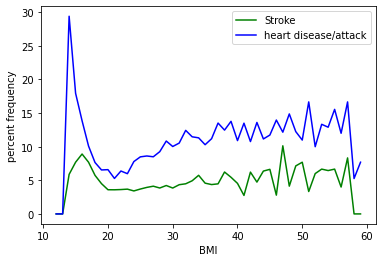

In [136]:
#sorted(list(df['BMI'].unique()))
plt.plot(df.groupby("BMI")['Stroke'].mean()*100 , label = "Stroke" ,color = 'green')
plt.xlabel("BMI")
plt.ylabel("Stroke")
plt.plot(df.groupby("BMI")['HeartDiseaseorAttack'].mean()*100 ,color = 'Blue',label ="heart disease/attack" )
plt.xlabel("BMI")
plt.ylabel("percent frequency")
plt.legend(loc="upper right")

# Cholesterol and diabetes

In this part, percentage rates are plotted as a function of BMI. 
As the legend shows, High Cholesterol is plotted in red and Diabetes is plotted in orange

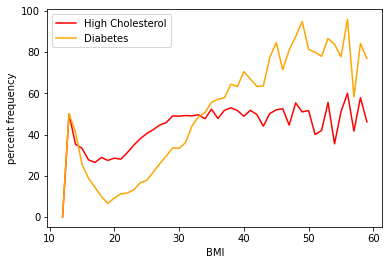

In [137]:
plt.plot(df.groupby("BMI")['HighChol'].mean()*100 , label = "High Cholesterol" ,color = 'red')
plt.xlabel("BMI")
plt.plot(df.groupby("BMI")['Diabetes'].mean()*100 ,color = 'Orange',label ="Diabetes" )
plt.xlabel("BMI")
plt.ylabel("percent frequency")
plt.legend(loc="upper left")

as we can see from the plots, all explored occurence follow a similar pattern. All occurences tend to increase sharply at very low bmi. Around BMI = 17 to BMI = 22, events are lowest. All seem to gradually increase as BMI increases. However stroke rates remain low for BMI up to 30.

In [115]:
stroke = df.loc[(df["Stroke"] ==1)]
stroke = stroke.loc[:,["BMI"]]


heartAttack = df.loc[(df["HeartDiseaseorAttack"] ==1)]
heartAttack = heartAttack.loc[:,["BMI"]]


highchol = df.loc[(df["HighChol"] ==1)]
highchol = highchol.loc[:,["BMI"]]


diabetes = df.loc[(df["Diabetes"] ==2)]
diabetes = diabetes.loc[:,["BMI"]]

Here I have shown the distributions of positive occurence by BMI. In future milestones, I will scale this to population size of each BMI, and observe how the distribution of positive occurences behave over different BMI values. 

# Stroke:


In [116]:
sns.displot(stroke['BMI'], kind = 'kde')

# Heart Disease / Heart Attack:

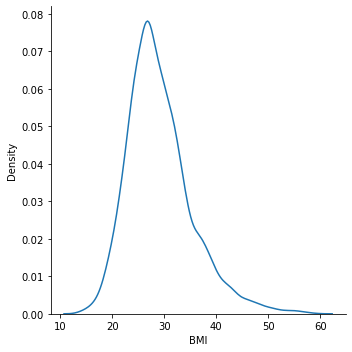

In [117]:
sns.displot(heartAttack['BMI'], kind = 'kde')


# High Cholesterol:

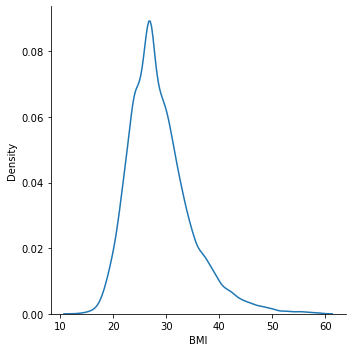

In [118]:
sns.displot(highchol['BMI'], kind = 'kde')


# diabetes

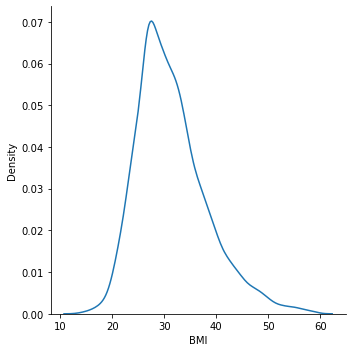

In [119]:
sns.displot(diabetes['BMI'], kind = 'kde')
